<h1>Импорт библиотек

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [51]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    res = np.zeros_like(V[0])
    for i in range(len(X)):
        res += np.dot(X[i], V[i])

    return res
    


X1 = [np.array([[1, 2], [3, 4]])]

V1 = [np.array([[1], [2]])]

result1 = np.array([[5],[11]])

assert np.array_equal(sum_prod(X1, V1), result1), "Тест 1 не пройден"


X2 = [np.array([[1, 2], [3, 4]]), np.array([[0, 1], [1, 0]])]

V2 = [np.array([[2], [1]]), np.array([[3], [2]])]

result2 = np.array([[6], [13]])
    
assert np.array_equal(sum_prod(X2, V2), result2), "Тест 2 не пройден"

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [20]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

print()



t1 = np.array([[0.4, 0.6], 
               [1, 0.2]])

res = np.array([[0, 1], 
                [1, 0]])
                  
assert np.all(np.equal(binarize(t1), res)), 'Ожидалось True'

t1 = np.array([[0.9, 0.6], 
               [1, 0.2]])

res = np.array([[0, 1], 
                [1, 1]])
                  
assert ~np.all(np.equal(binarize(t1, 0.6), res)), 'Ожидалось False'

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [58]:
def unique_rows(mat):
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    return np.array([np.unique(col) for col in mat.T]).T




matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],
                    [1, 2, 3]])
result1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],
                    [1, 2, 3]])
assert np.array_equal(unique_rows(matrix1), result1), "Тест для строк не пройден"


matrix2 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],
                    [1, 2, 3]])
result2 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
assert np.array_equal(unique_columns(matrix2), result2), "Тест для столбцов не пройден"

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

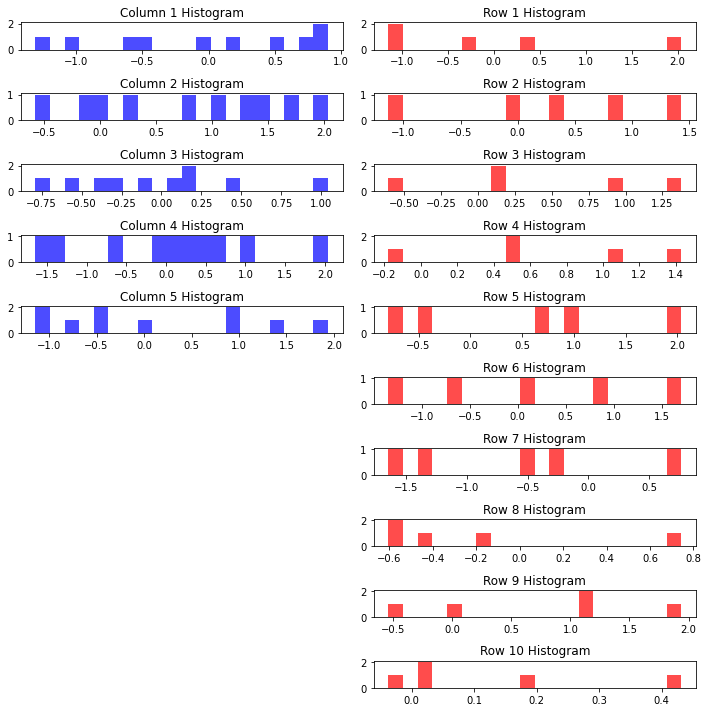

In [81]:
def get_result(m, n):
    matrix = np.random.normal(0, 1, size=(m, n))
    
    column_means = np.mean(matrix, axis=0)
    column_vars = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    mx = max(m, n)
    
    fig, axes = plt.subplots(mx, 2, figsize=(10, 10))
            
    for i in range(mx):
        if i < n:
            axes[i, 0].hist(matrix[:, i], bins=20, color='blue', alpha=0.7)
            axes[i, 0].set_title(f'Column {i+1} Histogram')
        else: 
            axes[i, 0].set_axis_off()
            
        if i < m:
            axes[i, 1].hist(matrix[i, :], bins=20, color='red', alpha=0.7)
            axes[i, 1].set_title(f'Row {i+1} Histogram')
        else:
            axes[i, 1].set_axis_off()
            
        
    plt.tight_layout()
    plt.show()

    
get_result(10, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [88]:
def chess(m, n, a, b):
    result = np.full((m, n), b)
    result[::2, ::2] = a
    result[1::2, 1::2] = a
    return result

result1 = np.array([[0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1],
                   [0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1],
                   [0, 1, 0, 1, 0]])
assert np.array_equal(chess(5, 5, 0, 1), result1), 'Тест 1 не пройден'


result2 = np.array([[3, 9, 3, 9],
                    [9, 3, 9, 3],
                    [3, 9, 3, 9]])
assert np.array_equal(chess(3, 4, 3, 9), result2), 'Тест 2 не пройден'

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

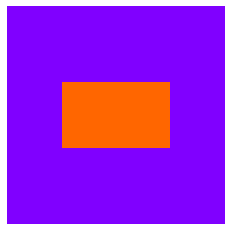

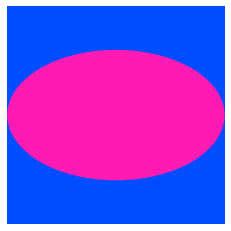

In [99]:
def draw_rectangle(a, b, m, n, rectangle_color=(0, 0, 0), background_color=(1, 1, 1)):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_aspect('equal', adjustable='box')
    ax.add_patch(Rectangle((0, 0), m, n, facecolor=background_color))
    ax.add_patch(Rectangle((m/2 - a/2, n/2 - b/2), a, b, facecolor=rectangle_color))
    ax.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color=(0, 0, 0), background_color=(1, 1, 1)):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_aspect('equal', adjustable='box')
    ax.add_patch(Rectangle((0, 0), m, n, facecolor=background_color))
    ax.add_patch(Ellipse((m/2, n/2), 2*a, 2*b, facecolor=ellipse_color))
    ax.axis('off')
    plt.show()


draw_rectangle(5, 3, 10, 10, rectangle_color=(1, 0.4, 0), background_color=(0.5, 0, 1))
draw_ellipse(5, 3, 10, 10, ellipse_color=(1, 0.1, 0.7), background_color=(0, 0.3, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [89]:

def one_hot_encoding(labels, num_classes=None):
    if num_classes is None:
        num_classes = np.max(labels) + 1
    
    one_hot_matrix = np.zeros((len(labels), num_classes))
    
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
    
    return one_hot_matrix

# Пример использования:
labels = [0, 2, 3, 0]
encoded_matrix = one_hot_encoding(labels)
print(encoded_matrix)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
